**Regresión logística**

In [5]:
import numpy as np
import scipy
import statsmodels.api as sm
from imblearn.combine import SMOTETomek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #modelo de regresión
from sklearn.metrics import classification_report #reporte del modelo de clasificación
from sklearn.metrics import confusion_matrix #matrix de confusión
from sklearn.feature_selection import RFE #selección de predictores
from pylab import rcParams

In [6]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [7]:
os.chdir("D:/Python/2. Nivel II/7/datos")

In [8]:
data=pd.read_csv("Grid v1.csv")

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
data.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,A1,A,1,0.0,0,0.0,NaN,0.0
1,A2,A,2,0.0,0,0.0,NaN,0.0
2,A3,A,3,0.0,0,0.0,NaN,0.0
3,A4,A,4,0.0,0,0.0,NaN,0.0
4,A5,A,5,0.0,0,0.0,NaN,0.0


In [96]:
len(data)

197640

In [10]:
data=data.loc[(data["rsrp"]<0)]

In [11]:
data.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
14400,AA127,AA,127,-115.7500,0,884.696988,01403753_LM_Ancon,10.856694
14949,AB127,AB,127,-112.7500,0,381.359613,01403753_LM_Ancon,11.205094
15498,AC127,AC,127,-118.3750,0,713.387431,01403753_LM_Ancon,8.729160
16046,AD126,AD,126,-115.3750,0,307.311721,01403753_LM_Ancon,9.607077
16596,AE127,AE,127,-118.1875,0,1728.576707,01403753_LM_Ancon,9.835512


In [12]:
pd.value_counts(data["incidentes"],sort=True)

0    21601
1     1279
2      167
3       41
4       11
6        2
7        1
5        1
Name: incidentes, dtype: int64

In [13]:
data["incidentes"]=data["incidentes"].replace([2,3,4,5,6,7],1)

In [14]:
round(pd.value_counts(data["incidentes"],sort=True)/len(data)*100,2)

0    93.5
1     6.5
Name: incidentes, dtype: float64

In [15]:
pd.value_counts(data["incidentes"],sort=True)

0    21601
1     1502
Name: incidentes, dtype: int64

**El 6.5% de las zonas han planteado algún reclamo**

- indicador base: 6.5% (1502)
- indicador objetivo: 3% (694)
    
- sensibilidad (requerida mínima) predecir 808 (sensibilidad=0.54)

In [16]:
808/1502

0.5379494007989347

**BENEFICIOS**:
- renovación por 18 meses y durante 6 meses pagar el 50% de su plan
- sistema de soporte técnico se contactará con los clientes que nuestro sistema alerte que presente fallas

- indicador base: 93.5%
- indicador objetivo: 97%
- especificidad (requerida mínima) predecir 0.98 (21 169 casos)

- Soport (optimizar) --> 808 clientes + 432 (falsos positivos) = 1240 clientes
- 50% DE LA LINEA POR 6 MESES 1240 CLIENTES

In [103]:
GANANCIA=(((808*89)*0.5))*6+((808*89)*12);print(GANANCIA)

1078680.0


In [104]:
PERDIDA=((432*89)*0.5)*6; print(PERDIDA)

115344.0


In [105]:
rentabilidad = GANANCIA-PERDIDA; print(rentabilidad)

963336.0


In [106]:
gasto=250000

In [107]:
RSI=(rentabilidad-gasto)/gasto; print(RSI)

2.853344


**RSI**: retorno sobre la inversión

**NOTA**: por cada dólar que invierto mi retorno de inversión es 2 dólares con 85 centavos.

In [17]:
data= data[["rsrp","redireccion","cqi","incidentes"]]

In [18]:
data = data.reset_index(drop=True)

In [19]:
data.head()

,rsrp,redireccion,cqi,incidentes
0,-115.7500,884.696988,10.856694,0
1,-112.7500,381.359613,11.205094,0
2,-118.3750,713.387431,8.729160,0
3,-115.3750,307.311721,9.607077,0
4,-118.1875,1728.576707,9.835512,0


**construir datos de entrenamiento y testeo**

In [20]:
x = data.iloc[:,0:3].values
y = data.iloc[:,3].values

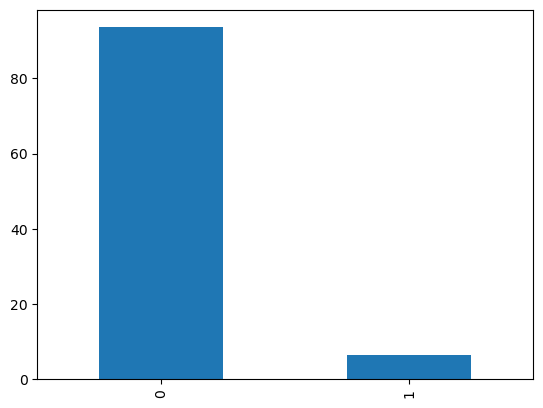

In [21]:
(pd.value_counts(data["incidentes"],sort=True)/len(data)*100).plot(kind="bar")
plt.show()

In [22]:
pd.value_counts(data["incidentes"],sort=True)

0    21601
1     1502
Name: incidentes, dtype: int64

**Probelam de desbalance en los datos**

**Recordemos**: el balanceo se aplica a los datos de entrenamiento

**Particionamos los datos en datos train y test**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=2022)

**Técnicas de balanceo de datos**

In [24]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [25]:
#Smote and Tomek
os_us = SMOTETomek(0.8,random_state=0)
x_train_st, y_train_st =os_us.fit_resample(x_train,y_train)

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [26]:
#Over Sampling
os =  RandomOverSampler(0.8,random_state=0)
x_train_os, y_train_os =os.fit_resample(x_train,y_train)

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [27]:
#Under Sampling
unds = NearMiss(sampling_strategy=0.8, 
                n_neighbors=11, 
                version=2)
x_train_us, y_train_us =unds.fit_resample(x_train,y_train)

**¿Qué es más conveniente trabajar con los datos balanceados (qué tecnica) o desbalanceados?**

**Criterio de AKAIKE** (comparación de los valores de AIC)
- data balanceada por Smote and Tomek AIC=30289.7673
- data balanceada por OverSampling AIC= 35618.2579
- data balanceada por UnderSampling AIC=2430.6456 (forma de balanceo seleccionada)
- data sin balancear AIC=7613.4035

In [28]:
import statsmodels.api as sm

In [30]:
logit=sm.Logit(y_train_us,x_train_us)
model= logit.fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.515663
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.249      
Dependent Variable: y                AIC:              2430.6456  
Date:               2022-12-11 11:23 BIC:              2447.9334  
No. Observations:   2351             Log-Likelihood:   -1212.3    
Df Model:           2                LL-Null:          -1615.1    
Df Residuals:       2348             LLR p-value:      1.2260e-175
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1    -0.0233      0.0034     -6.9072    0.0000    -0.0299    -0.0167
x2    -0.0001      0.0000    -21.1594    0.0000    -0.0001    -0.0001
x3    -0.0868      0.0454     -1.9098    0.0562    -0.1758     0.0023
==================================================================

"""

Conclusión: **siguiendo el criterio de Akaike se selecciona la forma de balanceo por UnderSampling**

In [31]:
logit_model = LogisticRegression()

In [32]:
model_logit = logit_model.fit(x_train_us,y_train_us)

In [34]:
y_predict_train=model_logit.predict(x_train_us)
y_predict_test=model_logit.predict(x_test)

In [35]:
y_predict_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
import os
os.getcwd()

'D:\\Python\\2. Nivel II\\7\\datos'

In [37]:
import model_evaluation_utils as meu

In [39]:
labels_names=[0,1]

In [40]:
meu.display_model_performance_metrics(y_train_us,
                                     y_predict_train,
                                     labels_names)

Model Performance metrics:
------------------------------
Accuracy: 0.8588
Precision: 0.8624
Recall: 0.8588
F1 Score: 0.8572

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1306
           1       0.90      0.77      0.83      1045

    accuracy                           0.86      2351
   macro avg       0.87      0.85      0.85      2351
weighted avg       0.86      0.86      0.86      2351


Prediction Confusion Matrix:
------------------------------
      0    1
0  1212   94
1   238  807


In [41]:
from sklearn.metrics import classification_report

In [42]:
report = classification_report(y_train_us,
                                     y_predict_train,
                                     labels_names) 

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1306
           1       0.90      0.77      0.83      1045

    accuracy                           0.86      2351
   macro avg       0.87      0.85      0.85      2351
weighted avg       0.86      0.86      0.86      2351



In [44]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

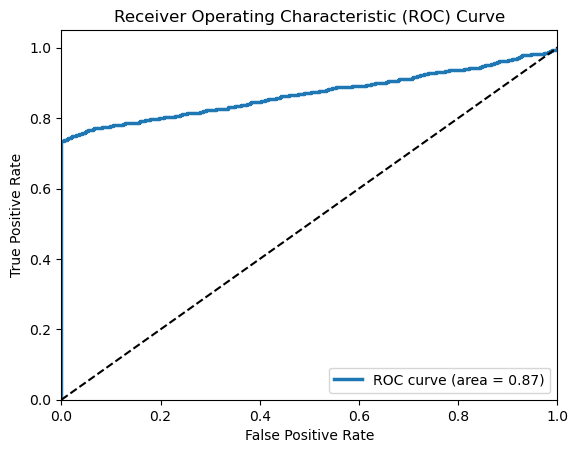

In [45]:
meu.plot_model_roc_curve(model_logit,
                        x_train_us,y_train_us)

In [46]:
meu.display_model_performance_metrics(y_test,
                                     y_predict_test,
                                     labels_names)

Model Performance metrics:
------------------------------
Accuracy: 0.1247
Precision: 0.7881
Recall: 0.1247
F1 Score: 0.1399

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.84      0.08      0.14      6474
           1       0.06      0.79      0.11       457

    accuracy                           0.12      6931
   macro avg       0.45      0.43      0.12      6931
weighted avg       0.79      0.12      0.14      6931


Prediction Confusion Matrix:
------------------------------
     0     1
0  503  5971
1   96   361


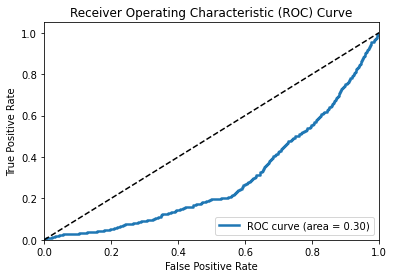

In [39]:
meu.plot_model_roc_curve(model_logit,
                        x_test,y_test)

**¿A qué se deben los problemas del modelo?**

**variación en los datos**

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
logit_model = LogisticRegression()

In [49]:
scores = cross_val_score(logit_model,
                        x_train_us,
                         y_train_us,
                        scoring="accuracy",
                        cv=10)

In [51]:
scores

array([0.86864407, 0.90212766, 0.88510638, 0.92340426, 0.90212766,
       0.90638298, 0.8893617 , 0.8893617 , 0.74042553, 0.38723404])

In [52]:
scores.mean()

0.8294175982690227

**Accuracy: 0.8588**

In [57]:
error=1-0.8588; print(error*100)

14.12


In [54]:
scores.mean()-scores

array([-0.03922647, -0.07271006, -0.05568878, -0.09398666, -0.07271006,
       -0.07696538, -0.0599441 , -0.0599441 ,  0.08899207,  0.44218356])

In [56]:
(1-scores)*100

array([13.13559322,  9.78723404, 11.4893617 ,  7.65957447,  9.78723404,
        9.36170213, 11.06382979, 11.06382979, 25.95744681, 61.27659574])

**Nota**: existe cierta variación interna del modelo que podría afectar el proceso de entrenamiento.

**probabilidad de corte**

In [53]:
model_logit = logit_model.fit(x_train_us,y_train_us)

In [54]:
y_predict_test = model_logit.predict_proba(x_test)

In [55]:
y_predict_test

array([[0.24126343, 0.75873657],
       [0.27516736, 0.72483264],
       [0.25836259, 0.74163741],
       ...,
       [0.23188282, 0.76811718],
       [0.42339311, 0.57660689],
       [0.17545132, 0.82454868]])

**Prob(y=1) - data test**

In [56]:
y_predict_test[:,1]

array([0.75873657, 0.72483264, 0.74163741, ..., 0.76811718, 0.57660689,
       0.82454868])

**¿Qué valores podría tomar ese punto de corte?**

1. La probabilidad de que ocurra o no el suceso (0.5).
2. Requerimiento: modelar la prob(y=moroso), algunas empresas o gerente no asumen el riesgo para tomar un valor de probabilidad y determinan para clasificar el caso una probabilidad de 0.3
3. AUC=0.3: criterio basado en el área bajo la curva ROC.

In [57]:
punto_c=0.3
y_pre_test=pd.DataFrame(np.where(y_predict_test[:,1]>=punto_c,1,0),columns=["prediccion"])

In [58]:
y_pre_test.head()

,prediccion
0,1
1,1
2,1
3,1
4,1


In [59]:
import model_evaluation_utils as meu
labels_names=[0,1]
meu.display_model_performance_metrics(y_test,
                                     y_pre_test,
                                     labels_names)

Model Performance metrics:
------------------------------
Accuracy: 0.0978
Precision: 0.7988
Recall: 0.0978
F1 Score: 0.0814

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.85      0.04      0.08      6474
           1       0.06      0.90      0.12       457

    accuracy                           0.10      6931
   macro avg       0.46      0.47      0.10      6931
weighted avg       0.80      0.10      0.08      6931


Prediction Confusion Matrix:
------------------------------
     0     1
0  268  6206
1   47   410


**matriz de confusión**

In [60]:
confusion_matriz= pd.crosstab(y_test,y_pre_test["prediccion"])

In [61]:
confusion_matriz

prediccion,0,1
row_0,,
0,268,6206
1,47,410


In [62]:
pd.value_counts(pd.DataFrame(y_test,columns=["y"])["y"],sort=True)

0    6474
1     457
Name: y, dtype: int64

In [64]:
VN=confusion_matriz[0][0]
VP=confusion_matriz[1][1]
FN=confusion_matriz[0][1]
FP=confusion_matriz[1][0]

In [65]:
accuracy_model=(VP+VN)/(VN+VP+FN+FP);print(accuracy_model)

0.09782138219593133


**Predicción del modelo para la clase positiva: reclamo**

In [66]:
sensibilidad_model=VP/(VP+FN); print(sensibilidad_model)

0.8971553610503282


**Nota**:indica que el modelo predice 90 de cada 100 casos de reclamo

**Predicción del modelo para la clase positiva: no reclamo**

In [67]:
especificidad_model=VN/(VN+FP); print(especificidad_model)

0.041396354649366696


**Nota**:indica que el modelo predice 4 de cada 100 casos de **No** reclamo

In [68]:
precision_1_model=VP/(VP+FP);print(precision_1_model)

0.061970979443772674


In [69]:
precision_0_model=VN/(VN+FN);print(precision_0_model)

0.8507936507936508
